# Problem: Find the best degree $5$ polynomial that fits the data from the file datafile.npy.

Let $$ C(a_0, \ldots, a_5) = \sum_{i = 0}^N (y_i - p(x_i))^2 = $$  
where $$p(x_i) = a_0 + a_1x_i + a_2x_i^2 + a_3x_i^3 + a_4x_i^4 + a_5x_i^5$$ 

In [2]:
# import modules
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

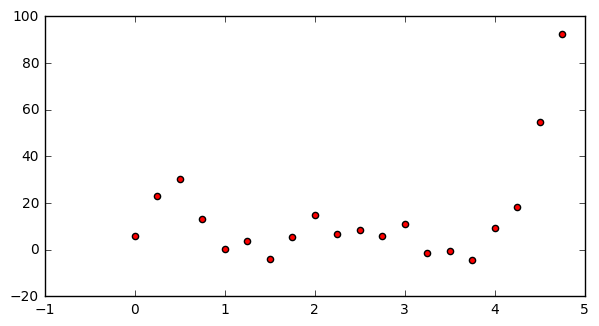

In [4]:
# load the data:
data=np.load('datafile.npy')
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.9, 0.7]) 
axes.scatter(data[:,0],data[:,1],c="r");


In [5]:
def cost_function(x,data):

    cost = 0
    for j in data:
        cost += (j[1] - p(x,j[0]))**2 
    return cost

In [6]:
def p(x,const):

    value = 0
    for i in range(len(const)):
        value += const[i] * x**i
    return value


The partial derivatives of $C$ is as follows: $$\begin{aligned} \frac{\partial C}{\partial a_0} &= \sum_{i = 0}^N -2(y_i - p(x_i)) \cdot 1 \\ \frac{\partial C}{\partial a_1} &= \sum_{i = 0}^N -2(y_i - p(x_i)) \cdot x_i \\ \frac{\partial C}{\partial a_2} &= \sum_{i = 0}^N -2(y_i - p(x_i)) \cdot x_i^2 \\ \frac{\partial C}{\partial a_3} &= \sum_{i = 0}^N -2(y_i - p(x_i)) \cdot x_i^3 \\ \frac{\partial C}{\partial a_4} &= \sum_{i = 0}^N -2(y_i - p(x_i)) \cdot x_i^4 \\ \frac{\partial C}{\partial a_5} &= \sum_{i = 0}^N -2(y_i - p(x_i)) \cdot x_i^5 \end{aligned} $$ 

Or simply $$ \begin{aligned} \nabla C &= \Big( \frac{\partial C}{\partial a_0}, \frac{\partial C}{\partial a_1}, \frac{\partial C}{\partial a_2}, \frac{\partial C}{\partial a_3}, \frac{\partial C}{\partial a_4}, \frac{\partial C}{\partial a_5} \Big) \\ &= \Big( \sum_{i = 0}^N -2\cdot (y_i - p(x_i)), \sum_{i = 0}^N -2x_i \cdot (y_i - p(x_i)), \sum_{i = 0}^N -2x_i^2 \cdot (y_i - p(x_i)), \sum_{i = 0}^N -2x_i^3 \cdot (y_i - p(x_i)), \sum_{i = 0}^N -2x_i^4 \cdot (y_i - p(x_i)), \sum_{i = 0}^N -2x_i^5 \cdot (y_i - p(x_i)) \Big) \end{aligned} $$ 


In [7]:
def cost_gradient(constants):
    mygrad = np.zeros(len(constants))
    for j in range(len(constants)):
        summation = 0
        for point in data:
            summation += (p(point[0],constants)-point[1])*point[0]**j
        mygrad[j] = summation
    return mygrad

In [8]:
def norm(vec):

    length = 0
    for i in range(len(vec)):
        length += vec[i]**2
    return length**(1.0/2)

In [9]:
def normalized(vec):

    length = norm(vec)
    unitVec = np.zeros(len(vec))
    for i in range(len(unitVec)):
        unitVec[i] = vec[i] / length
    return unitVec

In [10]:
def multSeq(h,vec):

    newVec = np.zeros(6)
    for i in range(len(newVec)):
        newVec[i] = vec[i] * h
    return newVec

In [11]:
#x_old is the list of constants
x_old = np.zeros(6)
h = 0.01 # step size
tolerance = 0.001
maxIterations = 5000
t = 1
x_new = np.zeros(6)

In [12]:
for i in range(len(x_new)):
    x_new[i] = x_old[i] + multSeq(-h,normalized(cost_gradient(x_old)))[i]

In [13]:
while t < maxIterations and (abs(x_new[0] - x_old[0])+abs(x_new[1] - x_old[1])+abs(x_new[2] - x_old[2])+
                            abs(x_new[3] - x_old[3])+abs(x_new[4] - x_old[4])+abs(x_new[5] - x_old[5])
                            ) > tolerance:
    
    for i in range(len(x_new)):
        x_old[i] = x_new[i]
    for j in range(len(x_new)):
        x_new[j] = x_old[j] - multSeq(h, normalized(cost_gradient(x_old)))[j]
    t += 1
print(x_new)

[ 0.08032254  0.06458722  0.04706228 -0.06684329 -0.38389691  0.11123817]


The best degree 5 polynomial has coefficients: 
a0: 0.0803225404923
a1: 0.0645872156651
a2: 0.0470622772964
a3: -0.0668432941729
a4: -0.383896909967
a5: 0.11123817405


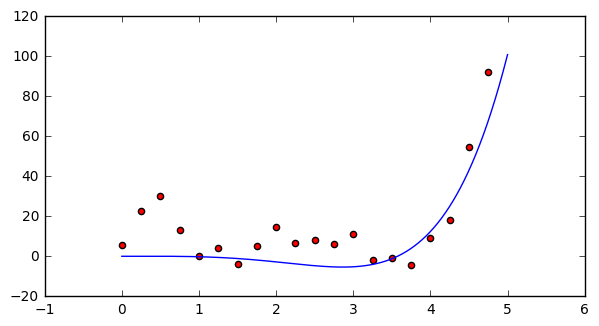

In [14]:
if i == maxIterations: 
    print("Maximum iteration was reached.")

print("The best degree 5 polynomial has coefficients: ")
for i in range(len(x_new)):
    print("a" + str(i) + ": " + str(x_new[i]))
    
x = np.linspace(0,5,1001)
y = p(x, x_new)
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.9, 0.7])
axes.plot(x,y) 
axes.scatter(data[:,0],data[:,1],c="r");